In [1]:
import pandas as pd

In [2]:
input_data = pd.read_csv("data/CTM_DataScientistCaseStudy.csv", index_col=False)
input_data = input_data.dropna(subset = ['UserSegment', 'Recency'])
print(input_data.shape)

(99507, 6)


In [4]:
def create_age_groups(age):
    if age < 30:
        return '18-29'
    elif age < 45:
        return '30-45'
    elif age < 60:
        return '45-60'
    else:
        return '60+'

In [5]:
input_data['Age Group'] = input_data['Age'].apply(lambda x : create_age_groups(x))
print(input_data['Age'].min(), input_data['Age'].max())

In [7]:
input_data['UserSegment'].value_counts()

C    58517
A    21017
B    19973
Name: UserSegment, dtype: int64

In [8]:
featurelist =['Age Group','Recency']
for feature in featurelist:
    print(input_data.groupby(['UserSegment', feature])['UserID'].count())

UserSegment  Age Group
A            18-29         4779
             30-45         8306
             45-60         6074
             60+           1858
B            18-29         5224
             30-45         7772
             45-60         5237
             60+           1740
C            18-29        20415
             30-45        20091
             45-60        13111
             60+           4900
Name: UserID, dtype: int64
UserSegment  Recency 
A            Active      17770
             Dormant      1227
             Inactive     2020
B            Active      12298
             Dormant      3145
             Inactive     4530
C            Active      25360
             Dormant     17903
             Inactive    15254
Name: UserID, dtype: int64


In [9]:
input_data.groupby(['UserSegment', 'Age Group','Recency'])['UserID'].count()

UserSegment  Age Group  Recency 
A            18-29      Active      4247
                        Dormant      157
                        Inactive     375
             30-45      Active      7083
                        Dormant      474
                        Inactive     749
             45-60      Active      4977
                        Dormant      431
                        Inactive     666
             60+        Active      1463
                        Dormant      165
                        Inactive     230
B            18-29      Active      3687
                        Dormant      555
                        Inactive     982
             30-45      Active      4737
                        Dormant     1255
                        Inactive    1780
             45-60      Active      2990
                        Dormant      956
                        Inactive    1291
             60+        Active       884
                        Dormant      379
                        

In [11]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99507 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   UserID       99507 non-null  int64 
 1   Age          99507 non-null  int64 
 2   UserSegment  99507 non-null  object
 3   Recency      99507 non-null  object
 4   PriorEvent   99507 non-null  int64 
 5   Event        99507 non-null  int64 
 6   Age Group    99507 non-null  object
dtypes: int64(4), object(3)
memory usage: 6.1+ MB


# Segments Profiling

In [12]:
def estimate_indexes(input_df:pd.DataFrame, target_variable:str, break_it_down_by:str, id_col:str= 'UserID'):
    distribution = pd.pivot_table(input_df, id_col, break_it_down_by, target_variable, 'count')
    distribution_percentages = distribution.div(distribution.sum(axis = 0))
    sample_distribution = input_df.groupby([break_it_down_by])[id_col].count()/user_segments_df.shape[0]
    distribution_indexes = distribution_percentages.div(sample_distribution, axis =0)

    return distribution_indexes

In [13]:
user_segments_df = input_data.dropna(subset = ['UserSegment'])
estimate_indexes(user_segments_df, 'UserSegment', 'Age Group', 'UserID')

UserSegment,A,B,C
Age Group,,,
18-29,0.743857,0.855624,1.141275
30-45,1.087272,1.070549,0.944575
45-60,1.177542,1.068345,0.912906
60+,1.035171,1.020100,0.980508


In [30]:
user_segments_df = input_data.dropna(subset = ['UserSegment'])
(estimate_indexes(user_segments_df, 'UserSegment', 'Age Group', 'UserID')* 100).to_clipboard()

In [31]:
(estimate_indexes(user_segments_df, 'UserSegment', 'Recency', 'UserID')*100).to_clipboard()

In [32]:
(estimate_indexes(user_segments_df, 'UserSegment', 'PriorEvent', 'UserID')*100).to_clipboard()

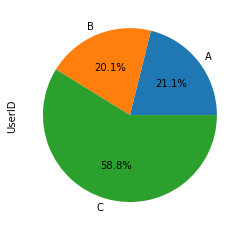

In [24]:
users_grouped = user_segments_df.groupby(['UserSegment'])['UserID'].count()
users_grouped = users_grouped/users_grouped.sum()
users_grouped.plot.pie(y = 'UserID', autopct='%1.1f%%')
# user_segments_df.plot.pie(y = 'UserSegment')